In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
jet = plt.cm.jet
colors = [jet(x) for x in np.linspace(1, 0.4, 256)]
green_to_red = LinearSegmentedColormap.from_list('GreenToRed', colors, N=256)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20
plt.rcParams['mathtext.fontset'] = 'cm'

In [2]:
def decompose_trajectory_fixed(vt_sample, fixed_speed = 15):
    mean_speed = fixed_speed/3600
    vt_sample['average_speed'] = mean_speed
    initial_space = vt_sample['space'].max()
    vt_sample['nominal_space'] = initial_space - mean_speed * (vt_sample['time'] - vt_sample['time'].min())
    vt_sample['oscillation_space'] =  - vt_sample['space'] + vt_sample['nominal_space']
    return vt_sample

In [3]:
vt_all = pd.read_csv('../demo_data/vt_lane_1.csv')

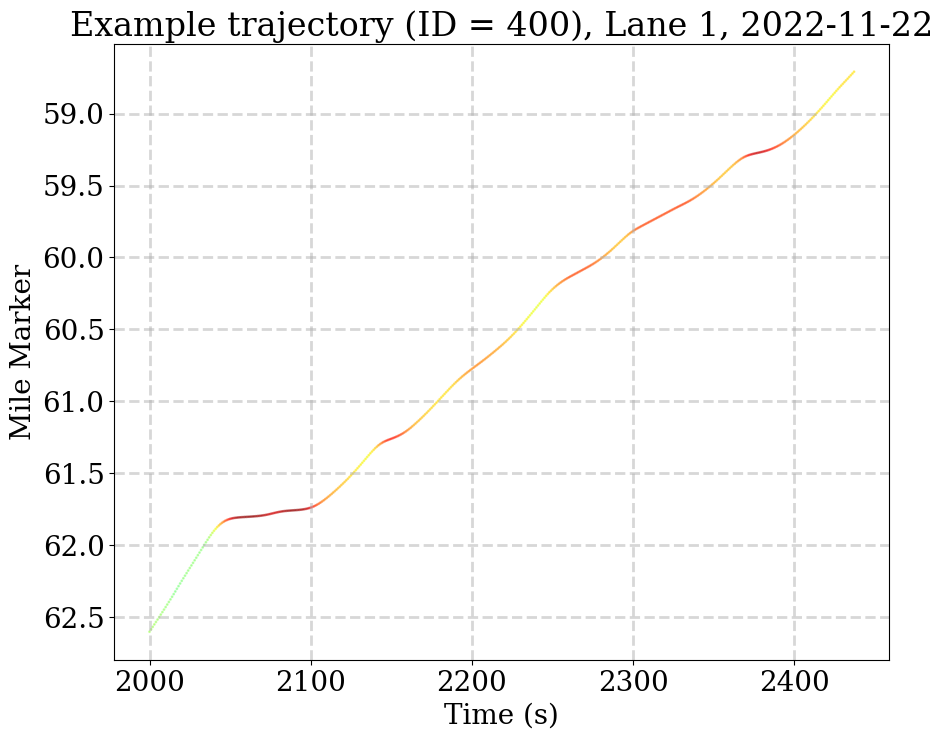

In [4]:
# plot all trajectories by v_id
plt.figure(figsize=(10, 8))
for v_id, traj in vt_all.groupby('v_id'):
    if v_id == 400:
        vt_sample = traj.copy()
        plt.scatter(traj['time'], traj['space'], c=traj['speed'], cmap=green_to_red, vmin=0, vmax = 80, s=1, alpha=0.5)
        break
# plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Mile Marker')
# inverse y axis
plt.gca().invert_yaxis()
plt.grid('on', linestyle='--', alpha=0.5, lw = 2)
plt.title('Example trajectory (ID = 400), Lane 1, 2022-11-22')
plt.show()

In [5]:
vt_sample = decompose_trajectory_fixed(vt_sample, fixed_speed=15)
# to find local minimum and maximum
tail_peaks, _ = find_peaks(vt_sample['oscillation_space'])
front_peaks, _ = find_peaks(-vt_sample['oscillation_space'])

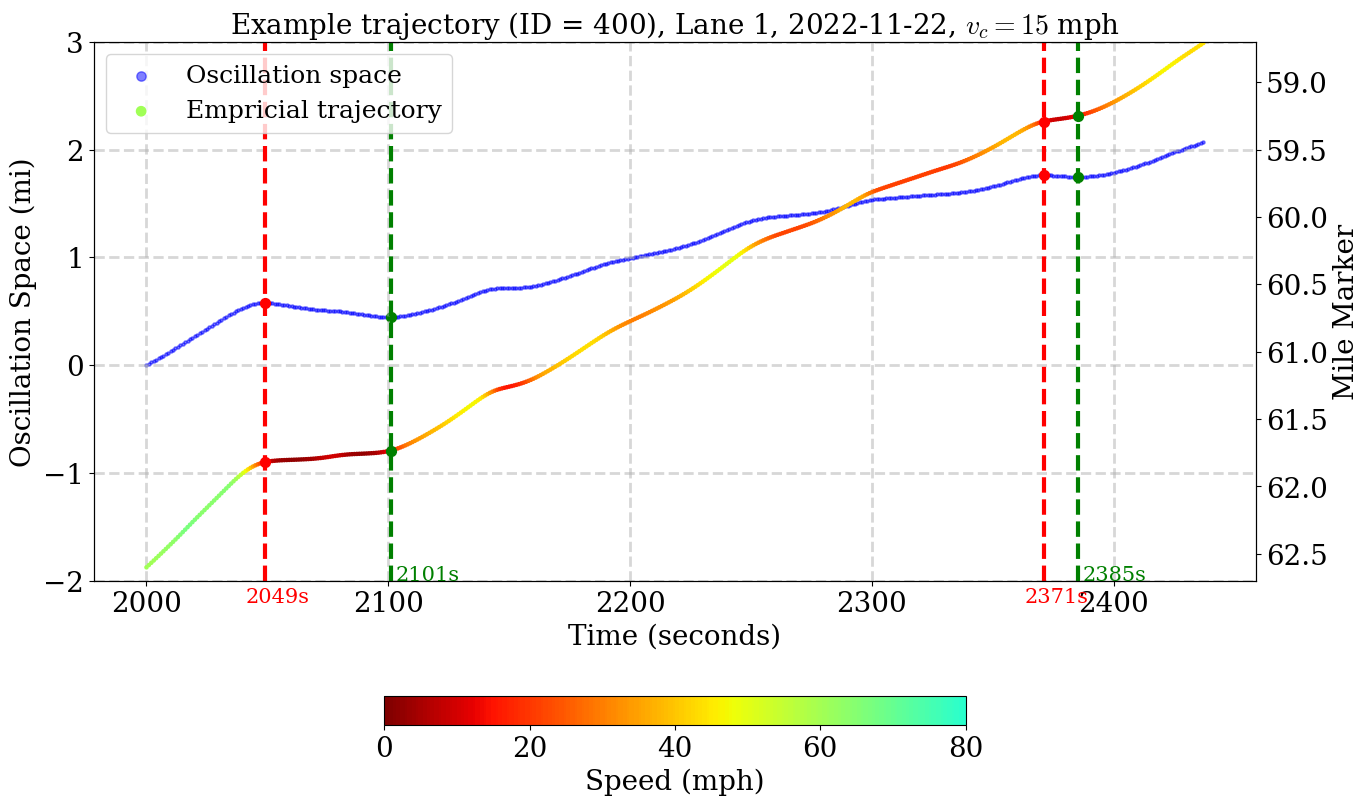

In [6]:
plt.figure(figsize=(15, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()
sc1 = ax1.scatter(vt_sample['time'], vt_sample['oscillation_space'], color = 'blue', 
                  alpha=0.5,
                  s=5, label='Oscillation space')
# sc2 = ax2.scatter(vt_sample['time'], vt_sample['nominal_space'], color='black', 
#                   alpha=0.2,
#                   s=5, label='Nominal trajectory by constant speed')
sc3 = ax2.scatter(vt_sample['time'], vt_sample['space'], c=vt_sample['speed'], cmap=green_to_red, 
                  vmin=0, vmax=80, s=5, label='Empricial trajectory')
ax2.set_ylim(62.7, 58.7)
ax1.set_ylabel('Oscillation Space (mi)')
ax2.set_ylabel('Mile Marker', color='Black')
ax1.set_ylim(-2, 3)
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles1 + handles2
all_labels = labels1 + labels2
plt.legend(all_handles, all_labels, loc='upper left', markerscale=3, fontsize=18)
# tail_peaks, _ = find_peaks(vt_sample['oscillation_space'])
# front_peaks, _ = find_peaks(-vt_sample['oscillation_space'])
ax1.scatter(vt_sample['time'].iloc[tail_peaks], vt_sample['oscillation_space'].iloc[tail_peaks], color='red', s = 50, label = 'Wave front')
ax1.scatter(vt_sample['time'].iloc[front_peaks], vt_sample['oscillation_space'].iloc[front_peaks], color='green', s = 50, label = 'Wave tail')
ax1.set_xlabel('Time (seconds)')
ax2.scatter(vt_sample['time'].iloc[tail_peaks], vt_sample['space'].iloc[tail_peaks], color='red', s = 50, label = 'Wave front')
ax2.scatter(vt_sample['time'].iloc[front_peaks], vt_sample['space'].iloc[front_peaks], color='green', s = 50, label = 'Wave tail')
# draw horizontal line for all the tails and fronts
for tp in tail_peaks:
    ax1.axvline(x=vt_sample['time'].iloc[tp], color='red', linestyle='--', linewidth=3)
    # add a text label
    ax1.text(vt_sample['time'].iloc[tp]-8, -2.2, f'{vt_sample["time"].iloc[tp]:.0f}s', color='red', fontsize=15)
for fp in front_peaks:
    ax1.axvline(x=vt_sample['time'].iloc[fp], color='green', linestyle='--', linewidth=3)
    # add a text label
    ax1.text(vt_sample['time'].iloc[fp]+2, -2, f'{vt_sample["time"].iloc[fp]:.0f}s', color='green', fontsize=15)
ax1.grid('on', linestyle='--', alpha=0.5, lw = 2)
cbar = plt.colorbar(sc3, ax=ax2, orientation='horizontal', pad=0.15, shrink=0.5)
cbar.set_label('Speed (mph)')
plt.title('Example trajectory (ID = 400), Lane 1, 2022-11-22, $v_c = 15$ mph', fontsize=20)
# create folder figures if not exist
import os
if not os.path.exists('../figures'):
    os.makedirs('../figures')
plt.savefig('../figures/identification_example.pdf', dpi=300, bbox_inches='tight')
plt.show()

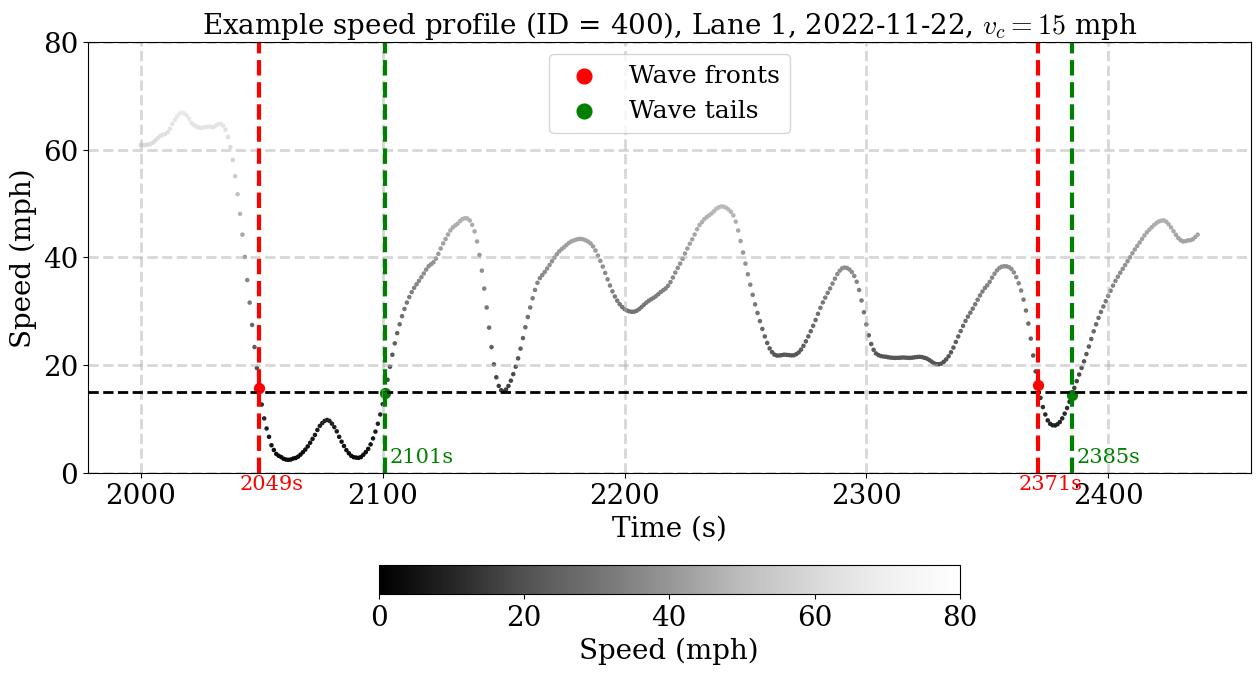

In [8]:
plt.figure(figsize=(15, 8))
plt.scatter(vt_sample['time'], vt_sample['speed'], c=vt_sample['speed'], cmap='Greys_r', vmin=0, vmax=80, s=5)
plt.xlabel('Time (s)')
plt.ylabel('Speed (mph)')
plt.ylim(0, 80)
plt.grid('on', linestyle='--', alpha=0.5, lw = 2)
# line y = 15
plt.axhline(y=15, color='black', linestyle='--', linewidth=2)
# colorbar
cbar = plt.colorbar(orientation='horizontal', pad=0.15, shrink= 0.5)
cbar.set_label('Speed (mph)')
plt.title('Example speed profile (ID = 400), Lane 1, 2022-11-22, $v_c = 15$ mph', fontsize=20)
for tp in tail_peaks:
    plt.axvline(x=vt_sample['time'].iloc[tp], color='red', linestyle='--', linewidth=3)
    # add a text label
    plt.text(vt_sample['time'].iloc[tp]-8, -3, f'{vt_sample["time"].iloc[tp]:.0f}s', color='red', fontsize=15)
for fp in front_peaks:
    plt.axvline(x=vt_sample['time'].iloc[fp], color='green', linestyle='--', linewidth=3)
    # add a text label
    plt.text(vt_sample['time'].iloc[fp]+2, 2, f'{vt_sample["time"].iloc[fp]:.0f}s', color='green', fontsize=15)
plt.scatter(vt_sample['time'].iloc[tail_peaks], vt_sample['speed'].iloc[tail_peaks], 
            color='red', s = 50, label = 'Wave fronts')
plt.scatter(vt_sample['time'].iloc[front_peaks], vt_sample['speed'].iloc[front_peaks], 
            color='green', s = 50, label = 'Wave tails')
plt.legend(loc='best', markerscale=1.5, fontsize=18)
plt.savefig('../figures/identification_speed_profile.pdf', dpi=300, bbox_inches='tight')
plt.show()